# <center> Klasterisasi Dataset CellPhone </center>

<div>
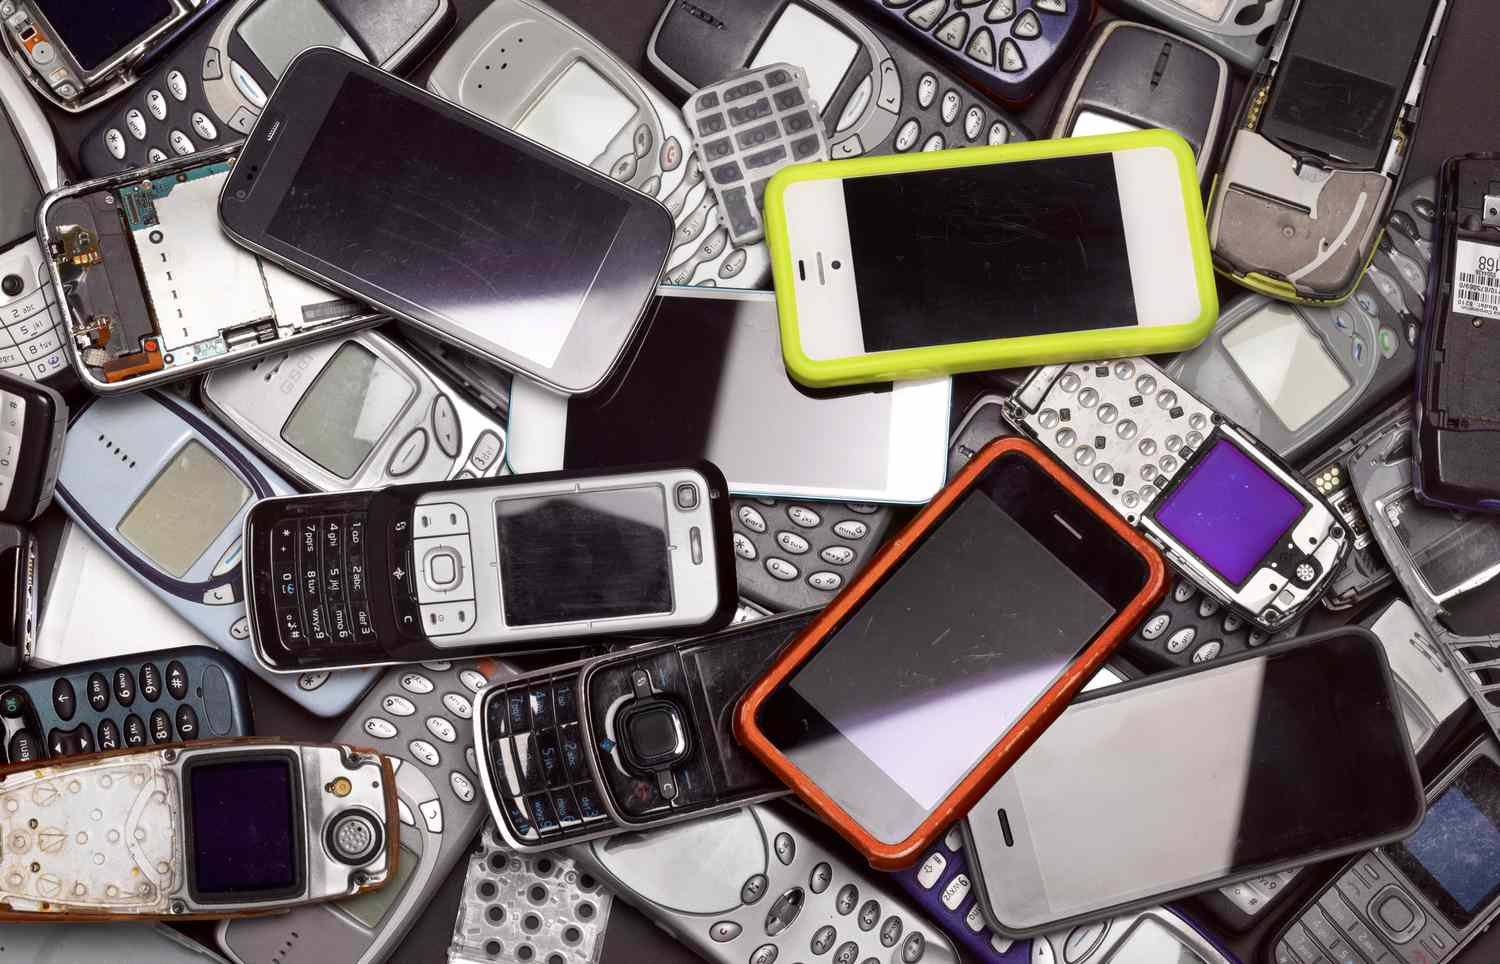
</div>

**Keterangan:**
>- battery_power : Total energy a battery can store in one time measured in mAh
>- blue : Has bluetooth or not
>- clock_speed : speed at which microprocessor executes instructions
>- dual_sim : Has dual sim support or not
>- fc: Front Camera mega pixels
>- four_g : Has 4G or not
>- int_memory : Internal Memory in Gigabytes
>- m_dep: Mobile Depth in cm
>- mobile_wt : Weight of mobile phone
>- n_cores : Number of cores of processor
>- pc : Primary Camera mega pixels
>- px_height : Pixel Resolution Height
>- px_width : Pixel Resolution Width
>- ram : Random Access Memory in Mega Bytes
>- sc_h : Screen Height of mobile in cm
>- sc_w : Screen Width of mobile in cm
>- talk_time : longest time that a single battery charge will last when you are
>- three_g : Has 3G or not
>- touch_screen : Has touch screen or not
>- wifi : Has wifi or not

***Sumber: Kaggle***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('cellphone_price.csv')
data

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
2995           1700     1          1.9         0   0       1          54   
2996            609     0          1.8         1   0       0          13   
2997           1185     0          1.4         0   1       1           8   
2998           1533     1          0.5         1   0       0          50   
2999           1270     1          0.5         0   4       1          35   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2   2         20       756  2549     9     7   
1       0.7        136        3   6        905      1988  2631    17     3   
2       0.9        145        5   6       1263      1716  2603    11     2   
3       0.8        131        6   9       1216      1786  2769    16     8   
4       0.6        141        2  14       1208      1212  1411     8     2   
...     ...        ...      ...  ..        ...       ...   ...   ...   ...   
2995    0.5        170        7  17        644       913  2121    14     8   
2996    0.9        186        4   2       1152      1632  1933     8     1   
2997    0.5         80        1  12        477       825  1223     5     0   
2998    0.4        171        2  12         38       832  2509    15    11   
2999    0.1        140        6  19        457       608  2828     9     2   

      talk_time  three_g  touch_screen  wifi  
0            19        0             0     1  
1             7        1             1     0  
2             9        1             1     0  
3            11        1             0     0  
4            15        1             1     0  
...         ...      ...           ...   ...  
2995         15        1             1     0  
2996         19        0             1     1  
2997         14        1             0     0  
2998          6        0             1     0  
2999          3        1             0     1  

[3000 rows x 20 columns]

In [3]:
data.duplicated().sum()

0

In [4]:
#Cek missing value
def deskripsi(dataa):
    total = data.isnull().sum().sort_index()
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_index()
    unique = data.nunique().sort_index()

    value = []
    for i in data.columns.sort_values():
        value.append(data[i].unique()) 
    un = pd.DataFrame({'Unique Value' : value}, index=data.columns.sort_values())
    return pd.concat([data.dtypes.sort_index(), total, percent, unique, un['Unique Value']], 
                     axis=1, keys=['Dtype','Missing Value', 'Missing Value (%)']).sort_values(by='Missing Value', ascending=False)
deskripsi(data)

Dtype  Missing Value  Missing Value (%)
battery_power    int64              0                0.0
blue             int64              0                0.0
touch_screen     int64              0                0.0
three_g          int64              0                0.0
talk_time        int64              0                0.0
sc_w             int64              0                0.0
sc_h             int64              0                0.0
ram              int64              0                0.0
px_width         int64              0                0.0
px_height        int64              0                0.0
pc               int64              0                0.0
n_cores          int64              0                0.0
mobile_wt        int64              0                0.0
m_dep          float64              0                0.0
int_memory       int64              0                0.0
four_g           int64              0                0.0
fc               int64              0                0.0
dual_sim         int64              0                0.0
clock_speed    float64              0                0.0
wifi             int64              0                0.0

# <center>EDA</center>

In [5]:
#Deskripsi data
data.describe().T

count         mean          std    min      25%     50%  \
battery_power  3000.0  1241.849000   437.063804  500.0   863.75  1232.0   
blue           3000.0     0.502000     0.500079    0.0     0.00     1.0   
clock_speed    3000.0     1.528467     0.820358    0.5     0.70     1.5   
dual_sim       3000.0     0.512000     0.499939    0.0     0.00     1.0   
fc             3000.0     4.404000     4.383742    0.0     1.00     3.0   
four_g         3000.0     0.510000     0.499983    0.0     0.00     1.0   
int_memory     3000.0    32.581667    18.152810    2.0    16.00    33.0   
m_dep          3000.0     0.507000     0.285969    0.1     0.20     0.5   
mobile_wt      3000.0   140.003000    35.213809   80.0   109.00   140.0   
n_cores        3000.0     4.456333     2.289361    1.0     2.00     4.0   
pc             3000.0     9.962333     6.073923    0.0     5.00    10.0   
px_height      3000.0   639.112333   440.202998    0.0   277.75   564.0   
px_width       3000.0  1247.601667   434.666168  500.0   865.00  1248.0   
ram            3000.0  2129.141333  1085.694231  256.0  1212.75  2147.5   
sc_h           3000.0    12.202667     4.251151    5.0     9.00    12.0   
sc_w           3000.0     5.616667     4.322494    0.0     2.00     5.0   
talk_time      3000.0    11.035667     5.474400    2.0     6.00    11.0   
three_g        3000.0     0.759667     0.427357    0.0     1.00     1.0   
touch_screen   3000.0     0.502000     0.500079    0.0     0.00     1.0   
wifi           3000.0     0.507000     0.500034    0.0     0.00     1.0   

                   75%     max  
battery_power  1619.00  1999.0  
blue              1.00     1.0  
clock_speed       2.30     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           6.00     8.0  
pc               15.00    20.0  
px_height       932.50  1960.0  
px_width       1634.00  1998.0  
ram            3065.25  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0

- **battery_power** memiliki nilai standar deviasi lebih kecil dari mean-nya, yang menunjukkan data kurang bervariasi.
- Jarak antara Q3 ke maks pada **battery_power** menunjukkan tidak terindikasi anomali.

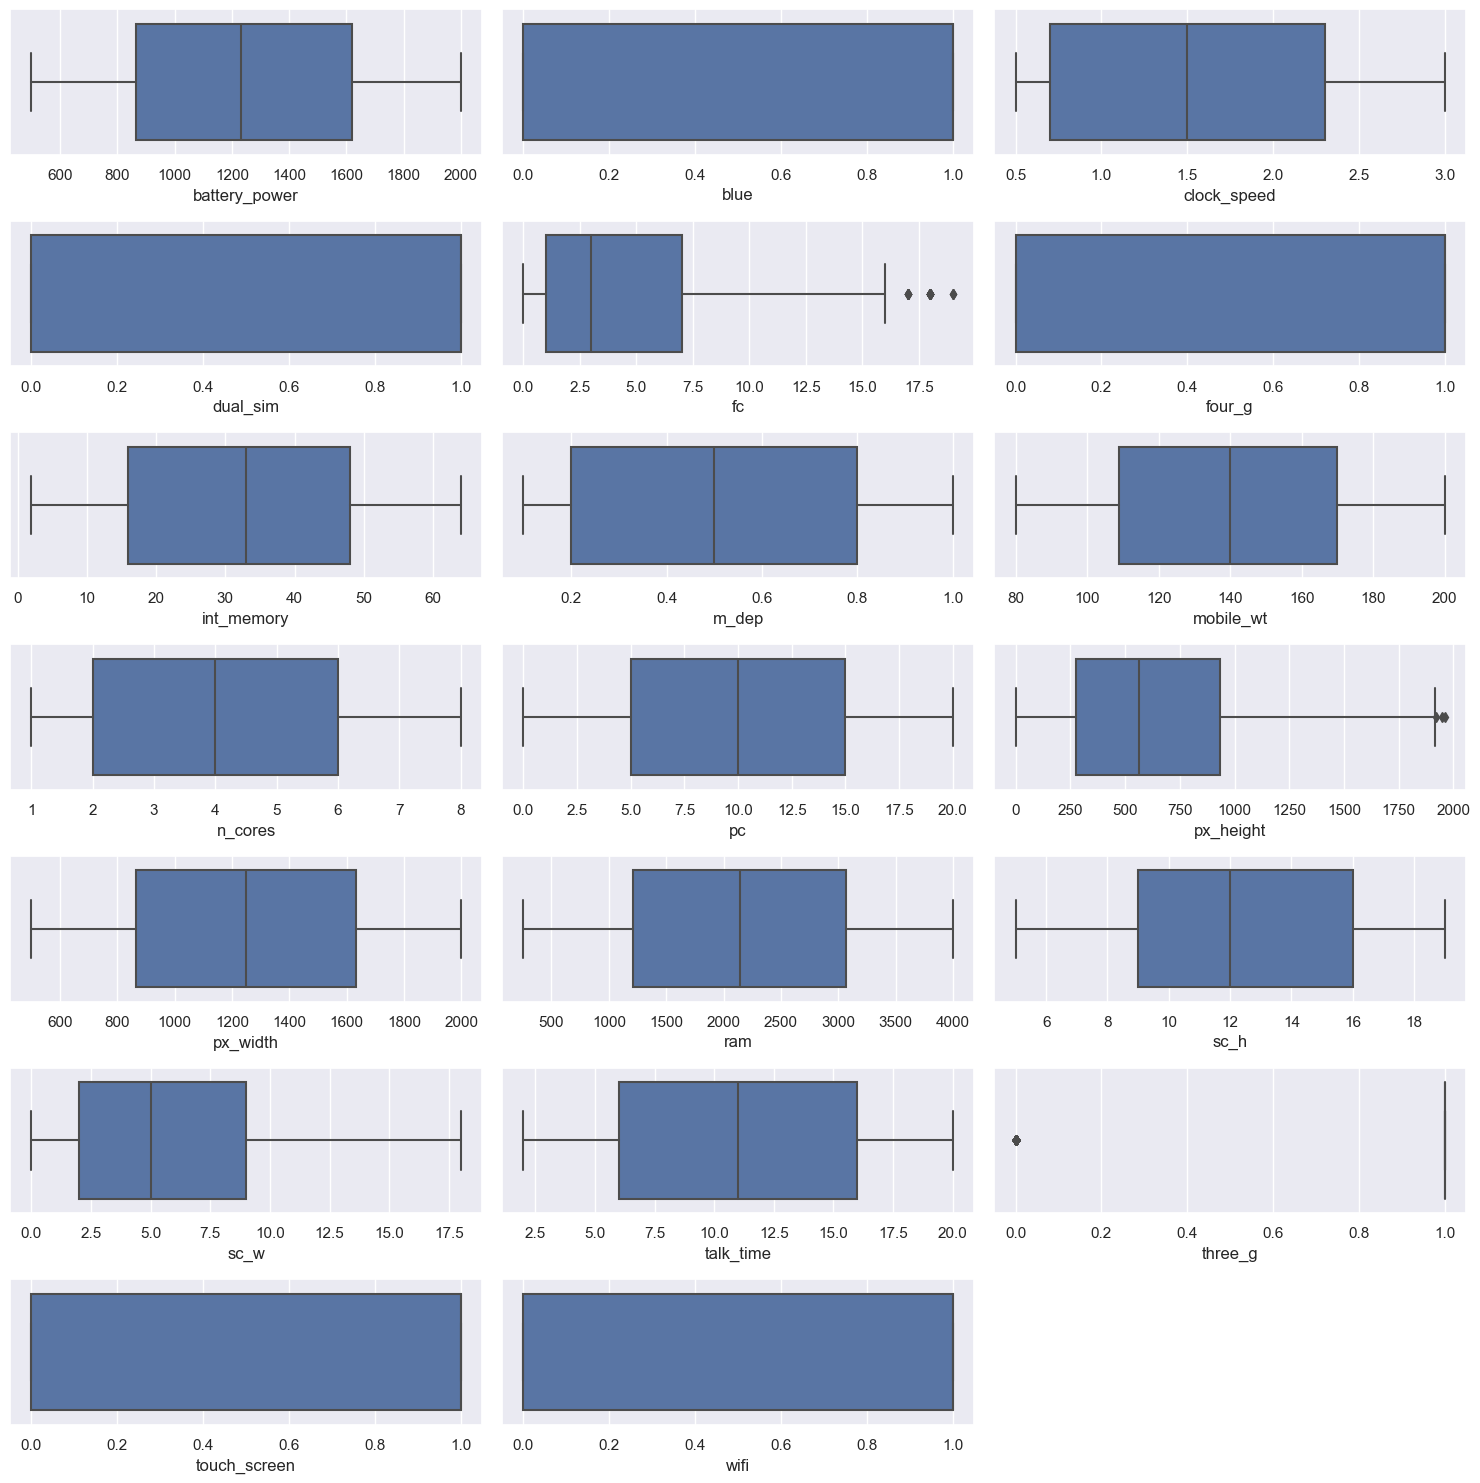

In [6]:
#Cek outlier
plt.figure(figsize = (15, 15))
x = 1 
for column in data.columns:
    plt.subplot(7, 3, x)
    sns.boxplot(data[column])
    x += 1
plt.tight_layout()

- Data kamera depan dan tinggi resolusi layar mengandung kemiringan kanan (positive skew).
- Sinyal 3G mengandung kemiringan kiri (negative skew).

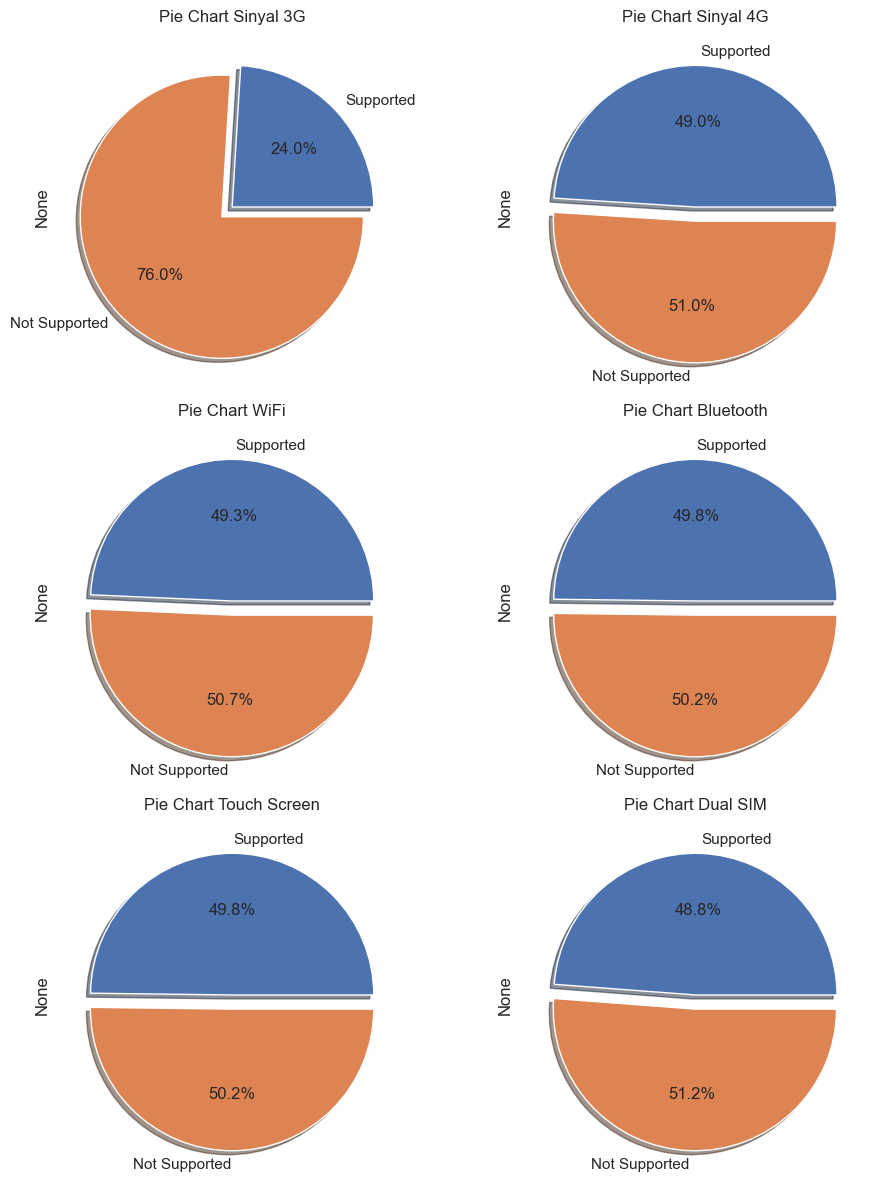

In [7]:
#Tipe properti berdasarkan harga sewa dan jarak
titles = ['Sinyal 3G', 'Sinyal 4G', 'WiFi', 'Bluetooth', 'Touch Screen', 'Dual SIM']
col = ['three_g', 'four_g', 'wifi', 'blue', 'touch_screen', 'dual_sim']
labels = ['Supported','Not Supported']
fig = plt.figure(figsize = (10, 12))
for i in range(len(col)):
    c = col[i]
    s = fig.add_subplot(3,2,i+1).set_title(f'Pie Chart {titles[i]}')
    ax = data.groupby(c).size().plot(autopct='%1.1f%%', kind = 'pie', shadow = True, explode = (0, 0.10), labels = labels)
fig.tight_layout()
plt.show() 

- Ponsel dengan support 2G lebih banyak terjual daripada yang support 3G dan 4G.
- Ponsel yang didukung dan tidaknya fitur Wifi, bluetooth, layar sentuh, dan dual SIM memiliki proporsi penjualan yang hampir sama. Sehingga, pada saat data diambil mayoritas orang lebih memilih ponsel biasa ataupun entry-level phone.

# <center>Data Preprocessing</center>

In [8]:
#Uji multikolinearitas
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif["Features"] = data.columns
vif[vif['VIF'] >= 10]

VIF   Features
8   12.986467  mobile_wt
12  11.605793   px_width
14  11.027632       sc_h

- Terjadi indikasi hubungan kuat antar variabel, sehingga perlu dilakukan uji Principal Component Analysis untuk mereduksi variabel agar menjadi komponen.

In [9]:
#Standarisasi data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
ss = StandardScaler()
scaled = pd.DataFrame(ss.fit_transform(data), columns = data.columns)
scaled.head()

battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0      -0.915005 -1.004008     0.818722 -1.024295 -0.776635 -1.020204   
1      -0.505386  0.996008    -1.253889  0.976281 -1.004789  0.980196   
2      -1.553462  0.996008    -1.253889  0.976281 -0.548481  0.980196   
3      -1.434467  0.996008     1.184477 -1.024295 -1.004789 -1.020204   
4       1.325316  0.996008    -0.400461 -1.024295  1.961209  0.980196   

   int_memory     m_dep  mobile_wt   n_cores        pc  px_height  px_width  \
0   -1.409475  0.325264   1.363244 -1.073113 -1.311123  -1.406659 -1.131175   
1    1.124990  0.675011  -0.113696 -0.636237 -0.652460   0.604112  1.703656   
2    0.463826  1.374504   0.141928  0.237515 -0.652460   1.417509  1.077784   
3   -1.244184  1.024757  -0.255709  0.674391 -0.158463   1.310722  1.238854   
4    0.629117  0.325264   0.028317 -1.073113  0.664865   1.292546 -0.081919   

        ram      sc_h      sc_w  talk_time   three_g  touch_screen      wifi  
0  0.386784 -0.753490  0.320085   1.455075 -1.777889     -1.004008  0.986097  
1  0.462324  1.128667 -0.605461  -0.737312  0.562465      0.996008 -1.014099  
2  0.436530 -0.282951 -0.836848  -0.371914  0.562465      0.996008 -1.014099  
3  0.589453  0.893397  0.551471  -0.006516  0.562465     -1.004008 -1.014099  
4 -0.661568 -0.988760 -0.836848   0.724279  0.562465      0.996008 -1.014099

- Dilakukan standarisasi data untuk menyeragamkan nilai-nilai pada data dengan cara merubah skalanya.

## PCA

In [10]:
pca = PCA(random_state = 123)
pca.fit(scaled)
pca.explained_variance_ratio_

array([0.08290797, 0.0802096 , 0.07812815, 0.07320876, 0.05549883,
       0.05351468, 0.05303059, 0.05102077, 0.05085815, 0.04998497,
       0.04986818, 0.04897681, 0.04815003, 0.04696958, 0.04529476,
       0.04506214, 0.02490933, 0.02381775, 0.02116087, 0.0174281 ])

Text(0.5, 1.0, 'Scree Plot')

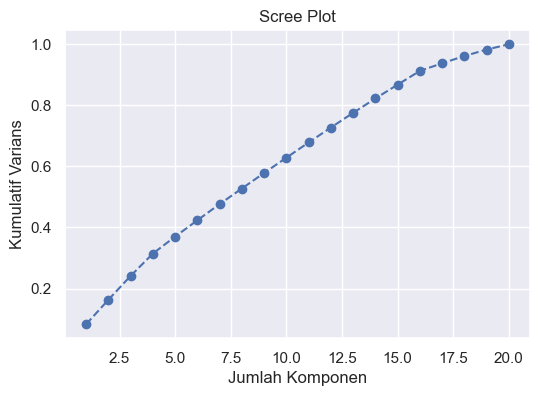

In [11]:
#Screeplot
plt.figure(figsize=(6, 4))
plt.plot(range(1, 21), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Kumulatif Varians')
plt.title('Scree Plot')

- Screeplot menunjukkan sebanyak 14 komponen dengan proporsi kumulatif varians sekitar 82% dapat menjelaskan variabel.

In [12]:
#Pemilihan komponen
pca = PCA(n_components = 14)
pca.fit_transform(scaled)
pca_components = pd.DataFrame(
    data = pca.components_.round(4),
    columns = scaled.columns.values,
    index = ['Komponen ' + str(i+1) for i in range(14)])
pca_components

battery_power    blue  clock_speed  dual_sim      fc  four_g  \
Komponen 1          0.0526 -0.0364       0.0252    0.0111  0.6988 -0.0165   
Komponen 2          0.0089  0.0313       0.0917    0.0009 -0.0375 -0.5619   
Komponen 3         -0.0037 -0.0453       0.0262   -0.0113 -0.0078 -0.3879   
Komponen 4          0.1104 -0.0694       0.0365   -0.0022 -0.0745  0.1598   
Komponen 5         -0.4178  0.1918       0.1079    0.5474  0.0092  0.0038   
Komponen 6         -0.1801 -0.4891      -0.0051   -0.0497 -0.0043 -0.0232   
Komponen 7         -0.2584  0.2349       0.5999    0.0027 -0.0119  0.0327   
Komponen 8          0.1661  0.0459       0.3022   -0.1371 -0.0344  0.0176   
Komponen 9         -0.1699  0.1550      -0.3067    0.2929 -0.0115  0.0024   
Komponen 10        -0.0880 -0.0931       0.0177    0.2010  0.0253  0.0287   
Komponen 11        -0.1520 -0.4306      -0.1644    0.3629 -0.0235 -0.0070   
Komponen 12         0.3742 -0.0317       0.2792    0.1948 -0.0036 -0.0105   
Komponen 13         0.5122  0.2190       0.0767    0.2088 -0.0201 -0.0023   
Komponen 14         0.0741 -0.5597       0.1795   -0.1799 -0.0197 -0.0383   

             int_memory   m_dep  mobile_wt  n_cores      pc  px_height  \
Komponen 1      -0.0434  0.0388     0.0481  -0.0055  0.7003     0.0126   
Komponen 2      -0.0005  0.0187     0.0251  -0.0088 -0.0411    -0.2229   
Komponen 3       0.0316  0.0373    -0.0131  -0.0257 -0.0009     0.5047   
Komponen 4      -0.0511  0.1112     0.0287  -0.0364 -0.0577     0.4276   
Komponen 5      -0.0068 -0.1956     0.1690  -0.1652  0.0064     0.0536   
Komponen 6      -0.3956 -0.2998     0.2431  -0.0660 -0.0321    -0.0070   
Komponen 7      -0.1199  0.1163    -0.1299   0.2801 -0.0007     0.0122   
Komponen 8      -0.0430  0.2302     0.5970  -0.5797 -0.0251    -0.0235   
Komponen 9      -0.3290  0.2716     0.2471   0.3669  0.0126    -0.0057   
Komponen 10      0.5859  0.0383    -0.2955  -0.2646  0.0375     0.0007   
Komponen 11     -0.2517  0.3300    -0.3194  -0.3543 -0.0141    -0.0660   
Komponen 12     -0.3184 -0.5822    -0.2788  -0.0721  0.0064    -0.0127   
Komponen 13     -0.2948  0.4157    -0.2337  -0.0640 -0.0234    -0.0125   
Komponen 14      0.0677  0.2228    -0.0141   0.3399 -0.0099    -0.0269   

             px_width     ram    sc_h    sc_w  talk_time  three_g  \
Komponen 1     0.0416 -0.0132 -0.0436 -0.0678    -0.0210  -0.0248   
Komponen 2    -0.2300 -0.0571 -0.3519 -0.3689     0.0347  -0.5508   
Komponen 3     0.4687 -0.0051  0.3137  0.3102     0.0662  -0.4065   
Komponen 4     0.4614 -0.0652 -0.5103 -0.4914     0.0265   0.1558   
Komponen 5     0.0692  0.3517 -0.0602 -0.0706    -0.3879  -0.0140   
Komponen 6    -0.0211 -0.4647  0.0228  0.0231    -0.2128   0.0123   
Komponen 7     0.0489 -0.1200  0.0404  0.0601    -0.2201  -0.0041   
Komponen 8    -0.0628  0.1969  0.0561  0.0763     0.1306   0.0286   
Komponen 9    -0.0074  0.1391 -0.0176  0.0253     0.4726  -0.0138   
Komponen 10   -0.0336 -0.0906 -0.0054 -0.0325     0.1463   0.0162   
Komponen 11   -0.0185  0.0458  0.0609  0.0012     0.0181  -0.0399   
Komponen 12    0.0254  0.2914 -0.0070  0.0120     0.3406   0.0158   
Komponen 13   -0.0676 -0.1710  0.0471  0.0570    -0.3346  -0.0044   
Komponen 14   -0.0333  0.5905 -0.0474  0.0174    -0.2081   0.0075   

             touch_screen    wifi  
Komponen 1         0.0002 -0.0277  
Komponen 2         0.0106 -0.0146  
Komponen 3        -0.0254  0.0638  
Komponen 4         0.0382 -0.0429  
Komponen 5        -0.1581  0.2598  
Komponen 6         0.2953  0.2537  
Komponen 7         0.3818 -0.4211  
Komponen 8         0.1793 -0.0922  
Komponen 9         0.3579  0.1315  
Komponen 10        0.5827  0.2575  
Komponen 11       -0.0948 -0.4592  
Komponen 12        0.1307 -0.0202  
Komponen 13        0.0382  0.4099  
Komponen 14        0.1029  0.1941

- Komponen 1 terdiri dari variabel kamera depan dan kamera utama, sehingga  disebut komponen fotografi.
- Komponen 2 terdiri dari variabel 4G dan 3G, sehingga disebut komponen sinyal.
- Komponen 3 terdiri dari variabel tinggi pixel dan lebar pixel, sehingga disebut komponen resolusi.
- Komponen 4 terdiri dari variabel tinggi layar dan lebar layar, sehingga disebut komponen ukuran layar.
- Komponen 5 terdiri dari variabel dual SIM.
- Komponen 7 terdiri dari variabel kecepatan prosesor.
- Komponen 9 terdiri dari variabel daya tahan baterai.
- Komponen 11 terdiri dari variabel WiFi.
- Komponen 12 terdiri dari variabel tebal ponsel.
- Komponen 13 terdiri dari variabel kapasitas baterai.
- Komponen 6, 8, 10, dan 14 menjelaskan variavbel lain dengan masing-masing kontribusi.

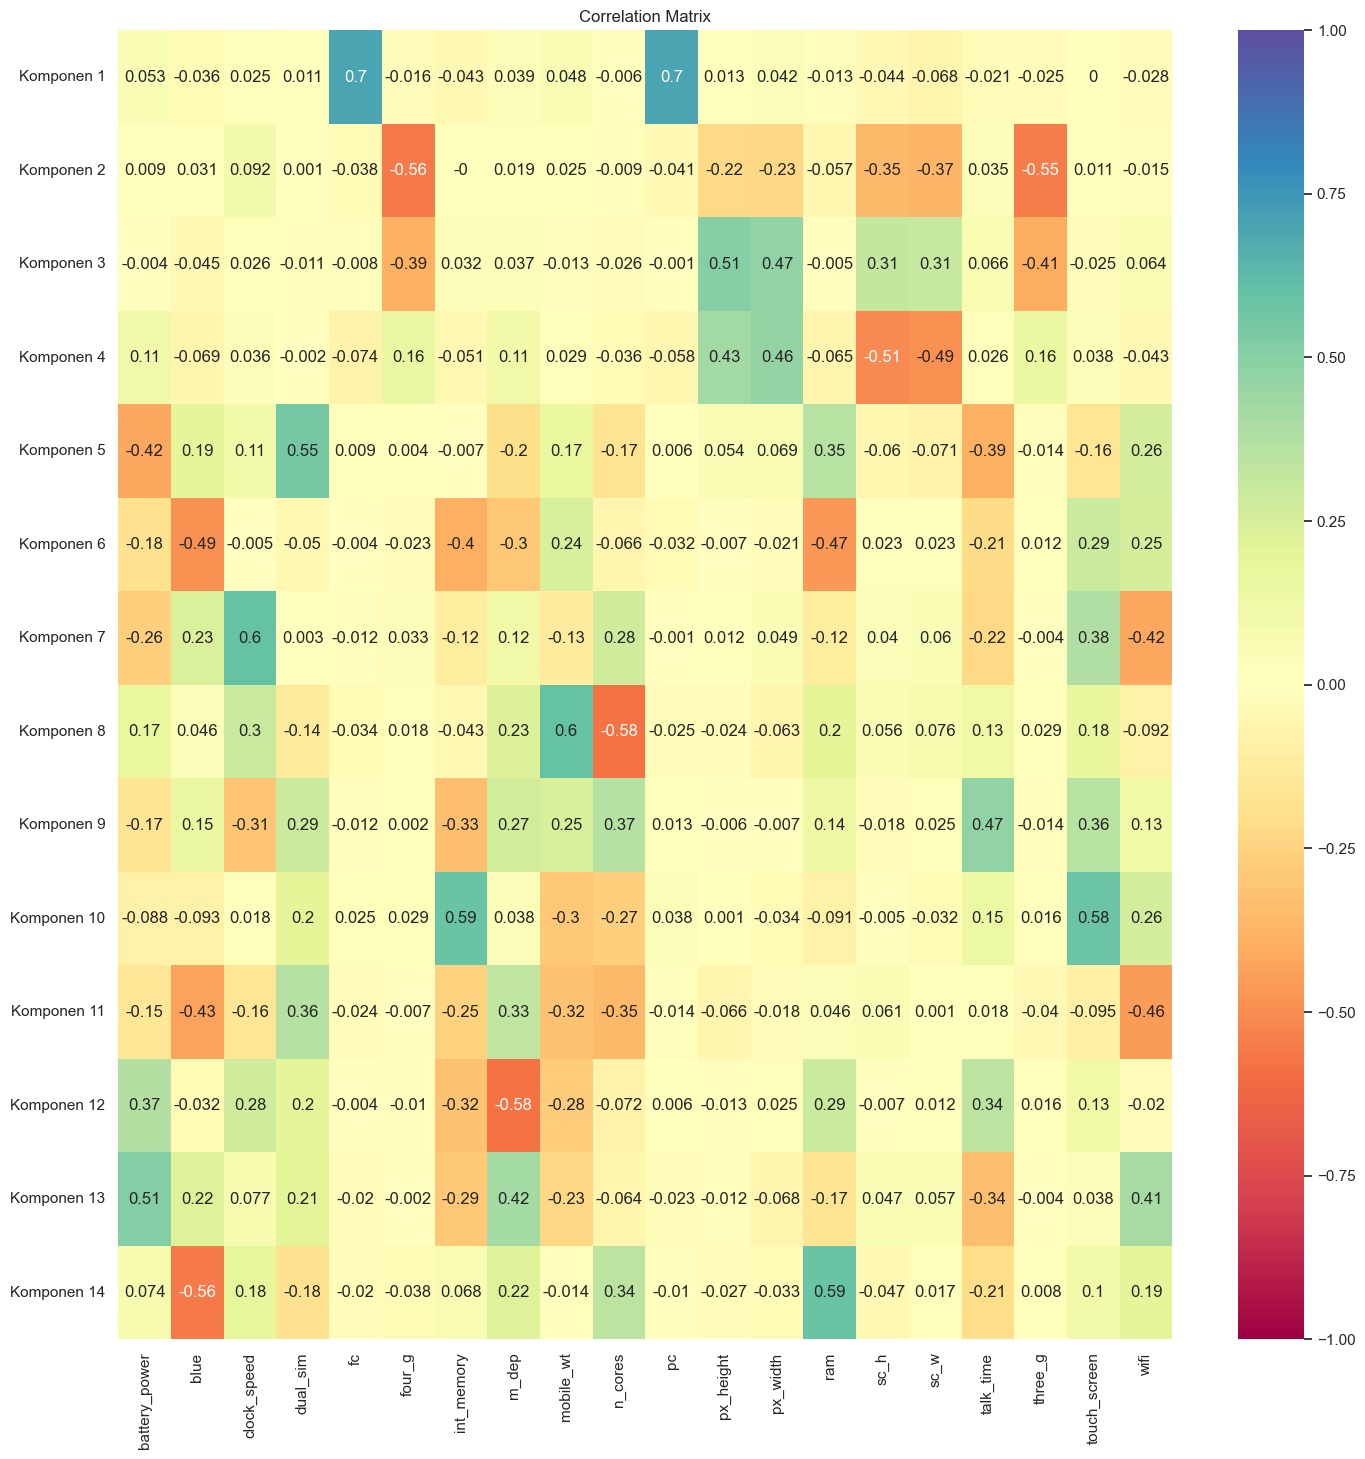

In [13]:
#Plot korelasi komponen
plt.figure(figsize=(17, 17))
s = sns.heatmap(pca_components.round(3), vmin = -1, vmax = 1, cmap = 'Spectral', annot = True)
plt.title('Correlation Matrix')
plt.show()

In [14]:
pca_scores = pca.transform(scaled)
hasil_pca = pd.concat([scaled.reset_index(drop = True), pd.DataFrame(pca_scores)], axis = 1)
hasil_pca.columns.values[-14:] = ['Komponen ' + str(i+1) for i in range(14)]
hasil_pca.head()

battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0      -0.915005 -1.004008     0.818722 -1.024295 -0.776635 -1.020204   
1      -0.505386  0.996008    -1.253889  0.976281 -1.004789  0.980196   
2      -1.553462  0.996008    -1.253889  0.976281 -0.548481  0.980196   
3      -1.434467  0.996008     1.184477 -1.024295 -1.004789 -1.020204   
4       1.325316  0.996008    -0.400461 -1.024295  1.961209  0.980196   

   int_memory     m_dep  mobile_wt   n_cores  ...  Komponen 5  Komponen 6  \
0   -1.409475  0.325264   1.363244 -1.073113  ...   -0.067873    1.100292   
1    1.124990  0.675011  -0.113696 -0.636237  ...    0.882769   -1.111407   
2    0.463826  1.374504   0.141928  0.237515  ...    1.042121   -0.964070   
3   -1.244184  1.024757  -0.255709  0.674391  ...    0.157281   -0.893936   
4    0.629117  0.325264   0.028317 -1.073113  ...   -1.586655   -0.846162   

   Komponen 7  Komponen 8  Komponen 9  Komponen 10  Komponen 11  Komponen 12  \
0   -1.046597    1.833856    0.508001    -1.199337     0.341584     0.107874   
1    0.451329    0.103865    0.348366     1.126367     0.788908    -1.001664   
2    0.919928   -0.284361    1.500441     0.655318     0.820563    -1.628571   
3    1.899443    0.100499    0.173904    -1.959489     0.260717    -0.518648   
4   -0.038796    1.013044   -0.310031     0.867611    -0.491701     0.011528   

   Komponen 13  Komponen 14  
0    -0.592675     0.603058  
1    -0.200032    -0.795662  
2    -0.541407    -0.507364  
3    -0.385562     0.114655  
4    -0.007335    -1.311007  

[5 rows x 34 columns]

# <center>K-Means Clustering</center>

## k Optimal dengan Silhouette Index

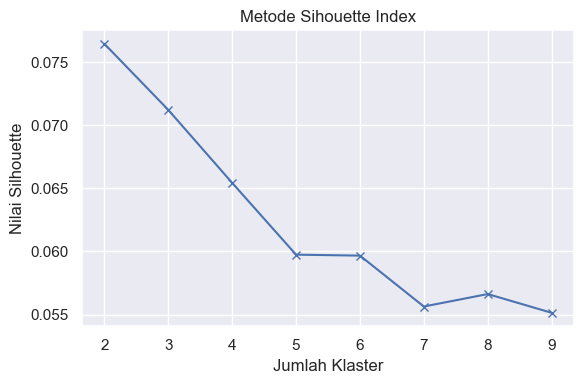

In [15]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 10):
    si = KMeans(n_clusters=k, 
                max_iter=300, 
                tol=1e-04, 
                init='k-means++', 
                n_init=10, 
                random_state=123, 
                algorithm='auto')
    si.fit(pca_scores)
    silhouette_scores.append(silhouette_score(pca_scores, si.labels_))

fig, ax = plt.subplots(figsize = (6,4))
ax.plot(range(2, 10), silhouette_scores, 'bx-')
ax.set_title('Metode Sihouette Index')
ax.set_xlabel('Jumlah Klaster')
ax.set_ylabel('Nilai Silhouette')
plt.xticks(range(2, 10))
plt.tight_layout()
plt.show()

- Plot Silhouette menunjukkan nilai Silhouette tertinggi berada pada k = 2, maka jumlah klaster optimal sebanyak 2.

## k Optimal dengan Elbow

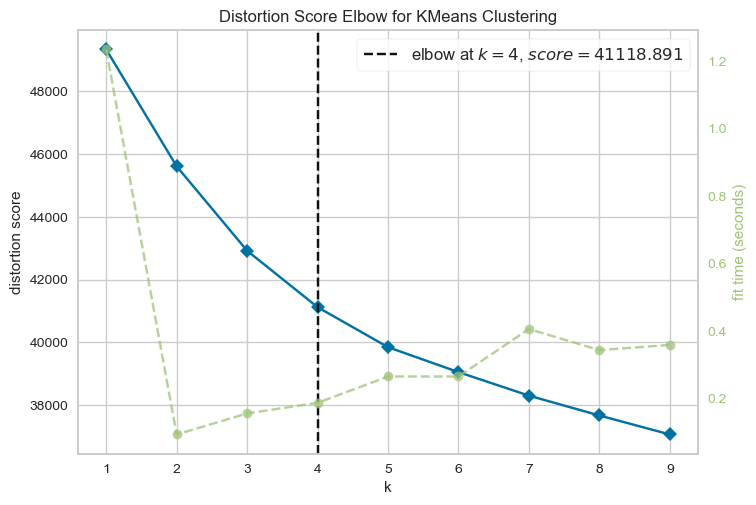

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
from yellowbrick.cluster import KElbowVisualizer
el = KMeans(random_state = 123)
visualizer = KElbowVisualizer(el, k=(1,10))
visualizer.fit(pca_scores)
visualizer.show()

- Plot Elbow menunjukkan nilai siku berada pada k = 4, maka jumlah klaster optimal sebanyak 4.

## Model

### k = 2

In [17]:
kmeans = KMeans(2, random_state = 123)
model1 = kmeans.fit_predict(pca_scores)
model1

array([1, 0, 0, ..., 0, 1, 0])

In [18]:
hasil_klaster = hasil_pca.copy()
hasil_klaster['Klaster KMeans 1'] = model1
hasil_klaster.head()

battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0      -0.915005 -1.004008     0.818722 -1.024295 -0.776635 -1.020204   
1      -0.505386  0.996008    -1.253889  0.976281 -1.004789  0.980196   
2      -1.553462  0.996008    -1.253889  0.976281 -0.548481  0.980196   
3      -1.434467  0.996008     1.184477 -1.024295 -1.004789 -1.020204   
4       1.325316  0.996008    -0.400461 -1.024295  1.961209  0.980196   

   int_memory     m_dep  mobile_wt   n_cores  ...  Komponen 6  Komponen 7  \
0   -1.409475  0.325264   1.363244 -1.073113  ...    1.100292   -1.046597   
1    1.124990  0.675011  -0.113696 -0.636237  ...   -1.111407    0.451329   
2    0.463826  1.374504   0.141928  0.237515  ...   -0.964070    0.919928   
3   -1.244184  1.024757  -0.255709  0.674391  ...   -0.893936    1.899443   
4    0.629117  0.325264   0.028317 -1.073113  ...   -0.846162   -0.038796   

   Komponen 8  Komponen 9  Komponen 10  Komponen 11  Komponen 12  Komponen 13  \
0    1.833856    0.508001    -1.199337     0.341584     0.107874    -0.592675   
1    0.103865    0.348366     1.126367     0.788908    -1.001664    -0.200032   
2   -0.284361    1.500441     0.655318     0.820563    -1.628571    -0.541407   
3    0.100499    0.173904    -1.959489     0.260717    -0.518648    -0.385562   
4    1.013044   -0.310031     0.867611    -0.491701     0.011528    -0.007335   

   Komponen 14  Klaster KMeans 1  
0     0.603058                 1  
1    -0.795662                 0  
2    -0.507364                 0  
3     0.114655                 0  
4    -1.311007                 0  

[5 rows x 35 columns]

### k = 4

In [19]:
kmeans2 = KMeans(4, random_state = 123)
model2 = kmeans2.fit_predict(pca_scores)
model2

array([0, 2, 1, ..., 1, 0, 3])

In [20]:
hasil_klaster['Klaster KMeans 2'] = model2
hasil_klaster.head()

battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0      -0.915005 -1.004008     0.818722 -1.024295 -0.776635 -1.020204   
1      -0.505386  0.996008    -1.253889  0.976281 -1.004789  0.980196   
2      -1.553462  0.996008    -1.253889  0.976281 -0.548481  0.980196   
3      -1.434467  0.996008     1.184477 -1.024295 -1.004789 -1.020204   
4       1.325316  0.996008    -0.400461 -1.024295  1.961209  0.980196   

   int_memory     m_dep  mobile_wt   n_cores  ...  Komponen 7  Komponen 8  \
0   -1.409475  0.325264   1.363244 -1.073113  ...   -1.046597    1.833856   
1    1.124990  0.675011  -0.113696 -0.636237  ...    0.451329    0.103865   
2    0.463826  1.374504   0.141928  0.237515  ...    0.919928   -0.284361   
3   -1.244184  1.024757  -0.255709  0.674391  ...    1.899443    0.100499   
4    0.629117  0.325264   0.028317 -1.073113  ...   -0.038796    1.013044   

   Komponen 9  Komponen 10  Komponen 11  Komponen 12  Komponen 13  \
0    0.508001    -1.199337     0.341584     0.107874    -0.592675   
1    0.348366     1.126367     0.788908    -1.001664    -0.200032   
2    1.500441     0.655318     0.820563    -1.628571    -0.541407   
3    0.173904    -1.959489     0.260717    -0.518648    -0.385562   
4   -0.310031     0.867611    -0.491701     0.011528    -0.007335   

   Komponen 14  Klaster KMeans 1  Klaster KMeans 2  
0     0.603058                 1                 0  
1    -0.795662                 0                 2  
2    -0.507364                 0                 1  
3     0.114655                 0                 2  
4    -1.311007                 0                 3  

[5 rows x 36 columns]

## Plot

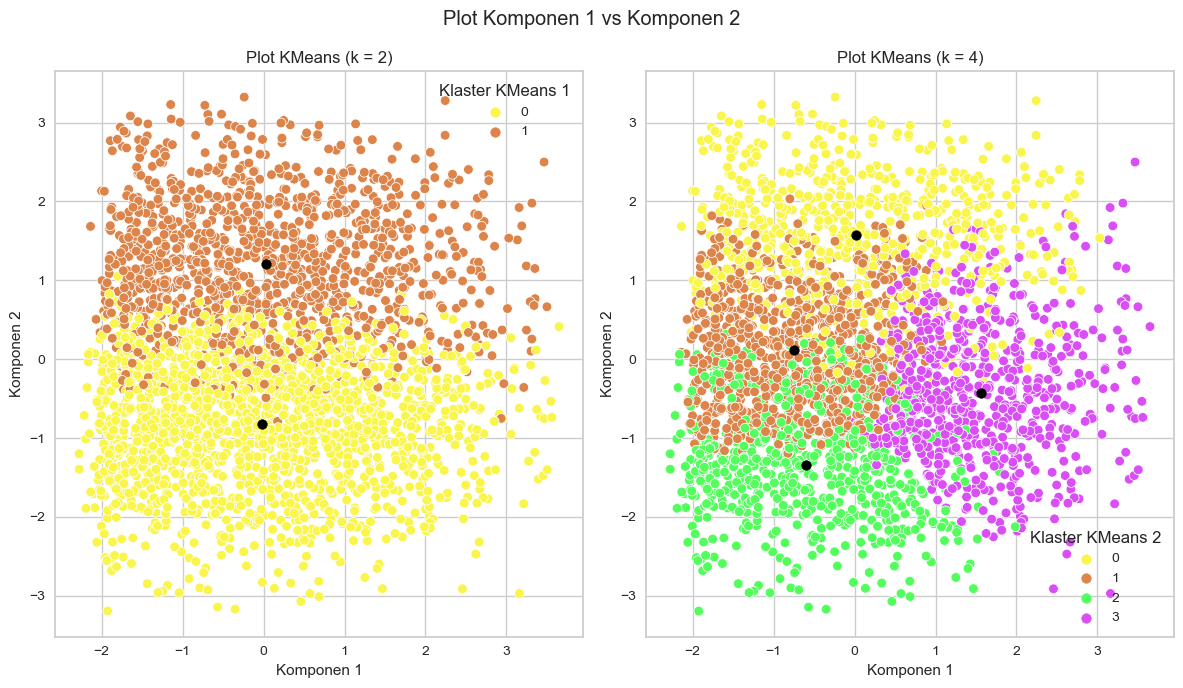

In [21]:
fig = plt.figure(figsize = (12,7))
plt.suptitle('Plot Komponen 1 vs Komponen 2')

sub = fig.add_subplot(1,2,1)
sns.scatterplot(data = hasil_klaster, x = 'Komponen 1', y = 'Komponen 2', hue = 'Klaster KMeans 1',
                palette = ['#F9F54B', '#DC8449'])
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], color='black')
plt.title('Plot KMeans (k = 2)')

sub = fig.add_subplot(1,2,2)
sns.scatterplot(data = hasil_klaster, x = 'Komponen 1', y = 'Komponen 2', hue = 'Klaster KMeans 2',
                palette = ['#F9F54B', '#DC8449', '#53FE5C', '#D94FF5'])
centers = np.array(kmeans2.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], color='black')
plt.title('Plot KMeans (k = 4)')
fig.tight_layout()

- Metode KMeans dengan k = 2 dan k = 4 menunjukkan hasil klaster yang tumpang tindih karena jarak antar klaster berdekatan.

## Uji Validitas

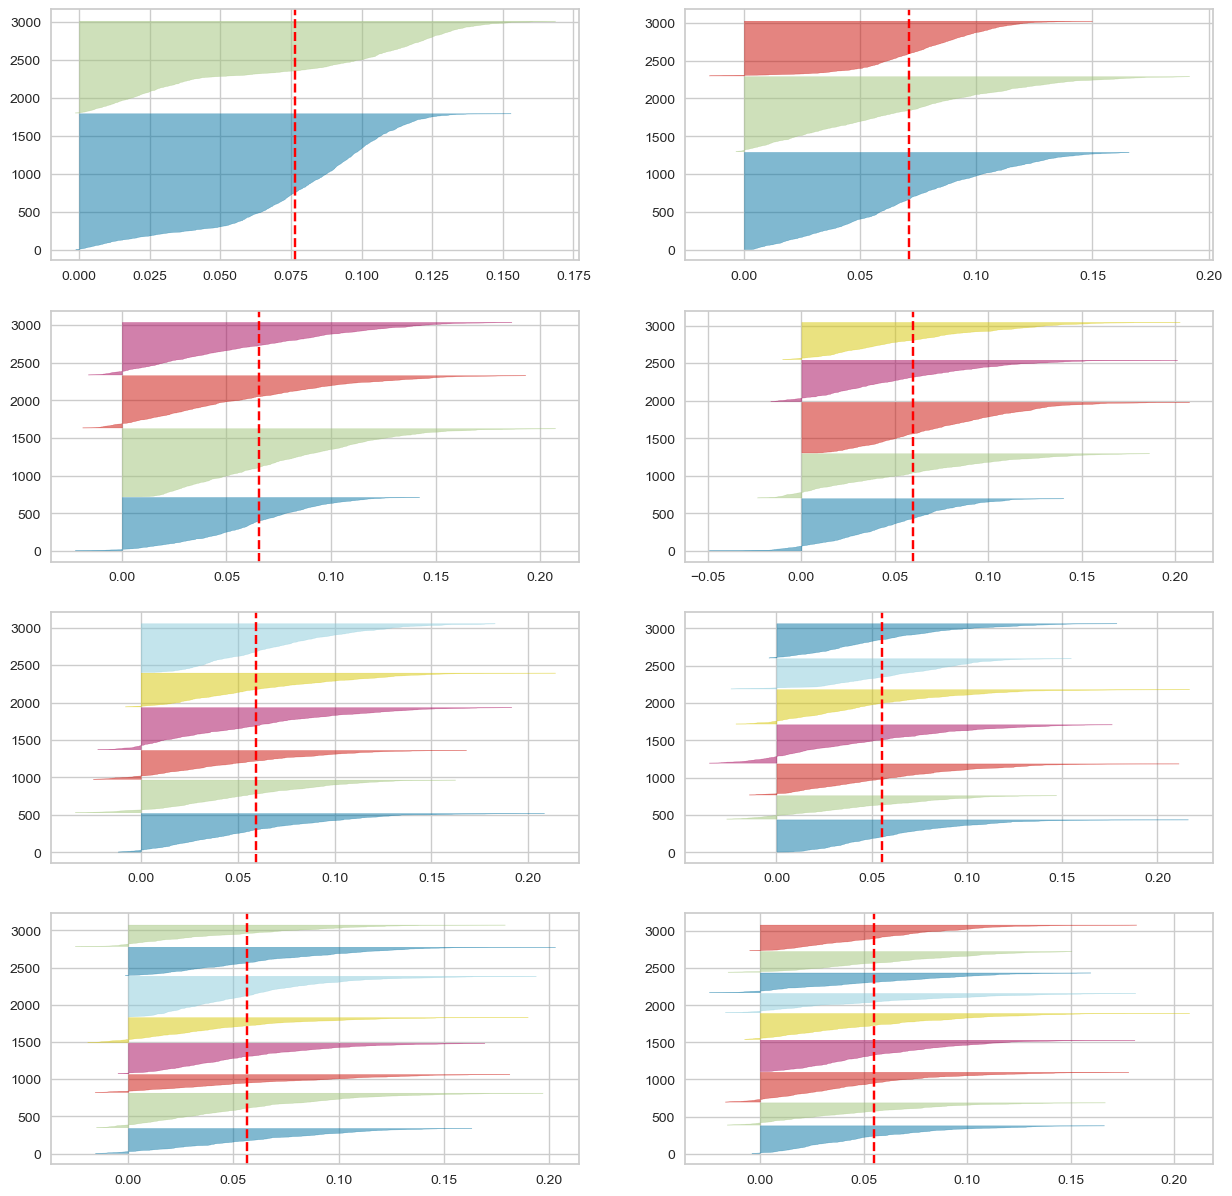

In [22]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(4, 2, figsize=(15,15))
for i in [2, 3, 4, 5, 6, 7, 8 , 9]:
    val_si = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=123)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(val_si, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(pca_scores)
plt.show()

- Plot Silhouette k = 2 memiliki lebar yang berbeda, sedangkan k = 4 memiliki lebar yang hampir sama.
- Terlihat nilai Silhouette negatif yang menunjukkan ada anomali.

In [23]:
#Silhouette Average
sil = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
for num_clusters in range_n_clusters:
    val_sil = KMeans(n_clusters = num_clusters)
    val_sil.fit(pca_scores)
    cluster_labels = val_sil.labels_
    silhouette_avg = silhouette_score(pca_scores, cluster_labels).round(4)
    print('Jumlah klaster = {0}, maka nilai Silhouette sebesar {1}'.format(num_clusters, silhouette_avg))
    sil.append([num_clusters, silhouette_avg])

Jumlah klaster = 2, maka nilai Silhouette sebesar 0.0759
Jumlah klaster = 3, maka nilai Silhouette sebesar 0.0712
Jumlah klaster = 4, maka nilai Silhouette sebesar 0.065
Jumlah klaster = 5, maka nilai Silhouette sebesar 0.0597
Jumlah klaster = 6, maka nilai Silhouette sebesar 0.0613
Jumlah klaster = 7, maka nilai Silhouette sebesar 0.0571
Jumlah klaster = 8, maka nilai Silhouette sebesar 0.0555
Jumlah klaster = 9, maka nilai Silhouette sebesar 0.0554


In [24]:
#DBI
from sklearn.metrics import davies_bouldin_score
labels = kmeans.labels_
labels2 = kmeans2.labels_
dbi = (davies_bouldin_score(pca_scores, labels)).round(4)
dbi2 = (davies_bouldin_score(pca_scores, labels2)).round(4)
print('DBI KMeans (k=2) sebesar', dbi)
print('DBI KMeans (k=4) sebesar', dbi2)

DBI KMeans (k=2) sebesar 3.3998
DBI KMeans (k=4) sebesar 2.9434


In [25]:
#C Index
from c_index import calc_c_index
cind = calc_c_index(pca_scores, labels).round(4)
cind2 = calc_c_index(pca_scores, labels2).round(4)
print('C Index KMeans (k=2) sebesar', cind)
print('C Index KMeans (k=4) sebesar', cind2)

C Index KMeans (k=2) sebesar 0.3518
C Index KMeans (k=4) sebesar 0.2927


# <center> Agglomerative Clustering Algorithm </center>

## Dendogram

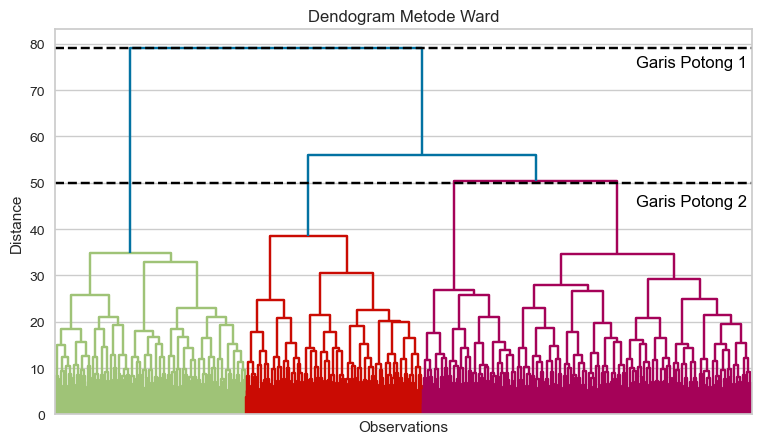

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage
den = linkage(pca_scores, method = 'ward')
plt.figure(figsize=(9, 5))
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(den, show_leaf_counts = False, no_labels = True)
plt.axhline(y = 79, color = 'black', linestyle = '--')
plt.text(25000, 75, 'Garis Potong 1', color = 'black')
plt.axhline(y = 50, color = 'black', linestyle = '--')
plt.text(25000, 45, 'Garis Potong 2', color = 'black')
plt.title('Dendogram Metode Ward')
plt.show()

- Dari dendogram, menunjukkan lifetime pada 2 klaster dan 4 klaster.

## Silhouette Index

In [27]:
from sklearn.cluster import AgglomerativeClustering
sil2 = []
for num_clusters in range(2,10):
    hc = AgglomerativeClustering(n_clusters = num_clusters)
    hc.fit(pca_scores)
    cluster_labels = hc.labels_
    silhouette_avg = silhouette_score(pca_scores, cluster_labels).round(4)
    print('Jumlah klaster = {0}, maka nilai Silhouette sebesar {1}'.format(num_clusters, silhouette_avg))
    sil2.append([num_clusters, silhouette_avg])

Jumlah klaster = 2, maka nilai Silhouette sebesar 0.0753
Jumlah klaster = 3, maka nilai Silhouette sebesar 0.0453
Jumlah klaster = 4, maka nilai Silhouette sebesar 0.036
Jumlah klaster = 5, maka nilai Silhouette sebesar 0.0294
Jumlah klaster = 6, maka nilai Silhouette sebesar 0.0252
Jumlah klaster = 7, maka nilai Silhouette sebesar 0.0198
Jumlah klaster = 8, maka nilai Silhouette sebesar 0.0187
Jumlah klaster = 9, maka nilai Silhouette sebesar 0.017


## Model

### k = 2

In [28]:
hir = AgglomerativeClustering(n_clusters = 2)
model3 = hir.fit_predict(pca_scores)
model3

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [29]:
hasil_klaster['Klaster Ward 1'] = model3
hasil_klaster.head()

battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0      -0.915005 -1.004008     0.818722 -1.024295 -0.776635 -1.020204   
1      -0.505386  0.996008    -1.253889  0.976281 -1.004789  0.980196   
2      -1.553462  0.996008    -1.253889  0.976281 -0.548481  0.980196   
3      -1.434467  0.996008     1.184477 -1.024295 -1.004789 -1.020204   
4       1.325316  0.996008    -0.400461 -1.024295  1.961209  0.980196   

   int_memory     m_dep  mobile_wt   n_cores  ...  Komponen 8  Komponen 9  \
0   -1.409475  0.325264   1.363244 -1.073113  ...    1.833856    0.508001   
1    1.124990  0.675011  -0.113696 -0.636237  ...    0.103865    0.348366   
2    0.463826  1.374504   0.141928  0.237515  ...   -0.284361    1.500441   
3   -1.244184  1.024757  -0.255709  0.674391  ...    0.100499    0.173904   
4    0.629117  0.325264   0.028317 -1.073113  ...    1.013044   -0.310031   

   Komponen 10  Komponen 11  Komponen 12  Komponen 13  Komponen 14  \
0    -1.199337     0.341584     0.107874    -0.592675     0.603058   
1     1.126367     0.788908    -1.001664    -0.200032    -0.795662   
2     0.655318     0.820563    -1.628571    -0.541407    -0.507364   
3    -1.959489     0.260717    -0.518648    -0.385562     0.114655   
4     0.867611    -0.491701     0.011528    -0.007335    -1.311007   

   Klaster KMeans 1  Klaster KMeans 2  Klaster Ward 1  
0                 1                 0               1  
1                 0                 2               0  
2                 0                 1               0  
3                 0                 2               0  
4                 0                 3               0  

[5 rows x 37 columns]

### k = 4

In [30]:
hir2 = AgglomerativeClustering(n_clusters = 4)
model4 = hir2.fit_predict(pca_scores)
model4

array([1, 0, 0, ..., 3, 1, 2], dtype=int64)

In [31]:
hasil_klaster['Klaster Ward 2'] = model4
hasil_klaster.head()

battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0      -0.915005 -1.004008     0.818722 -1.024295 -0.776635 -1.020204   
1      -0.505386  0.996008    -1.253889  0.976281 -1.004789  0.980196   
2      -1.553462  0.996008    -1.253889  0.976281 -0.548481  0.980196   
3      -1.434467  0.996008     1.184477 -1.024295 -1.004789 -1.020204   
4       1.325316  0.996008    -0.400461 -1.024295  1.961209  0.980196   

   int_memory     m_dep  mobile_wt   n_cores  ...  Komponen 9  Komponen 10  \
0   -1.409475  0.325264   1.363244 -1.073113  ...    0.508001    -1.199337   
1    1.124990  0.675011  -0.113696 -0.636237  ...    0.348366     1.126367   
2    0.463826  1.374504   0.141928  0.237515  ...    1.500441     0.655318   
3   -1.244184  1.024757  -0.255709  0.674391  ...    0.173904    -1.959489   
4    0.629117  0.325264   0.028317 -1.073113  ...   -0.310031     0.867611   

   Komponen 11  Komponen 12  Komponen 13  Komponen 14  Klaster KMeans 1  \
0     0.341584     0.107874    -0.592675     0.603058                 1   
1     0.788908    -1.001664    -0.200032    -0.795662                 0   
2     0.820563    -1.628571    -0.541407    -0.507364                 0   
3     0.260717    -0.518648    -0.385562     0.114655                 0   
4    -0.491701     0.011528    -0.007335    -1.311007                 0   

   Klaster KMeans 2  Klaster Ward 1  Klaster Ward 2  
0                 0               1               1  
1                 2               0               0  
2                 1               0               0  
3                 2               0               0  
4                 3               0               3  

[5 rows x 38 columns]

## Plot

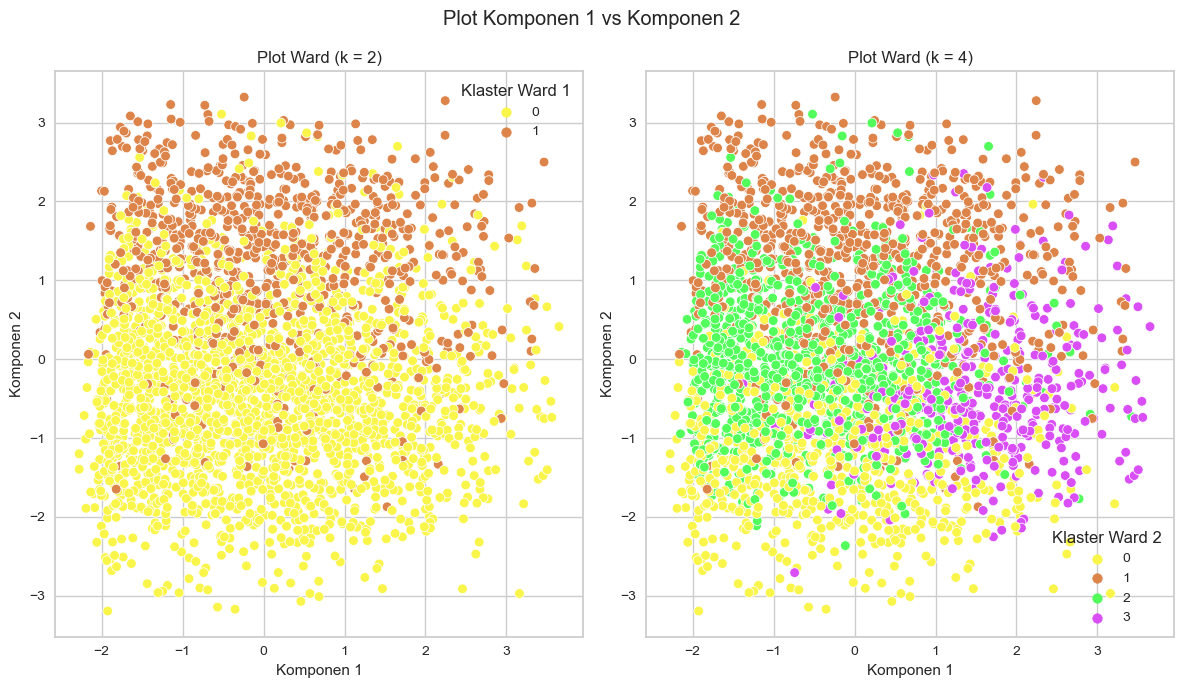

In [32]:
fig = plt.figure(figsize = (12,7))
plt.suptitle('Plot Komponen 1 vs Komponen 2')

sub = fig.add_subplot(1,2,1)
sns.scatterplot(data = hasil_klaster, x = 'Komponen 1', y = 'Komponen 2', hue = 'Klaster Ward 1',
                palette = ['#F9F54B', '#DC8449'])
plt.title('Plot Ward (k = 2)')

sub = fig.add_subplot(1,2,2)
sns.scatterplot(data = hasil_klaster, x = 'Komponen 1', y = 'Komponen 2', hue = 'Klaster Ward 2',
                palette = ['#F9F54B', '#DC8449', '#53FE5C', '#D94FF5'])
plt.title('Plot Ward (k = 4)')
fig.tight_layout()
plt.show()

- Metode Ward dengan k = 2 dan k = 4 menunjukkan hasil klaster yang tumpang tindih karena jarak antar klaster berdekatan.

## Uji Validitas

In [33]:
#Silhouette Average
print('Nilai Silhouette k = 2 sebesar', sil2[0][1])
print('Nilai Silhouette k = 4 sebesar', sil2[2][1])

Nilai Silhouette k = 2 sebesar 0.0753
Nilai Silhouette k = 4 sebesar 0.036


In [34]:
#DBI
from sklearn.metrics import davies_bouldin_score
labels3 = hir.labels_
labels4 = hir2.labels_
dbi3 = (davies_bouldin_score(pca_scores, labels3)).round(4)
dbi4 = (davies_bouldin_score(pca_scores, labels4)).round(4)
print('DBI Ward (k=2) sebesar', dbi3)
print('DBI Ward (k=4) sebesar', dbi4)

DBI Ward (k=2) sebesar 3.3882
DBI Ward (k=4) sebesar 3.6314


In [35]:
#C Index
cind3 = calc_c_index(pca_scores, labels3).round(4)
cind4 = calc_c_index(pca_scores, labels4).round(4)
print('C Index Ward (k=2) sebesar', cind3)
print('C Index Ward (k=4) sebesar', cind4)

C Index Ward (k=2) sebesar 0.3568
C Index Ward (k=4) sebesar 0.3474


# <center>Kesimpulan</center>

## Perbandingan Metode

In [36]:
from collections import Counter
print('Jumlah anggota KMeans (k = 2) yaitu', Counter(kmeans.labels_))
print('Jumlah anggota KMeans (k = 4) yaitu', Counter(kmeans2.labels_))
print('Jumlah anggota Ward (k = 2) yaitu', Counter(hir.labels_))
print('Jumlah anggota Ward (k = 4) yaitu', Counter(hir2.labels_))

Jumlah anggota KMeans (k = 2) yaitu Counter({0: 1789, 1: 1211})
Jumlah anggota KMeans (k = 4) yaitu Counter({1: 903, 0: 707, 3: 697, 2: 693})
Jumlah anggota Ward (k = 2) yaitu Counter({0: 2176, 1: 824})
Jumlah anggota Ward (k = 4) yaitu Counter({2: 1015, 1: 824, 0: 760, 3: 401})


In [37]:
tab = pd.DataFrame({'Skor' : ['Silhouette Index', 'Davies Bouldin Index', 'Hubert & Levin C Index'],
                'KMeans k = 2' : [sil[0][1], dbi, cind],
                'KMeans k = 4' : [sil[2][1], dbi2, cind2],
                'Ward k = 2' : [sil2[0][1], dbi3, cind3],
                'Ward k = 4' : [sil2[2][1], dbi4, cind4]})
tab = tab.set_index('Skor')
tab.style.highlight_between(left = [[0,1,1,1],[3,2,3,3],[1,0,1,1]], right = 3, axis = None, color = '#95BDFF')

- Metode KMeans dengan k = 2 memiliki nilai DBI dan C Index terkecil, sehingga merupakan metode terbaik dalam mengelompokkan dataset ini.
- Nilai C Index berada di antara 0 hingga 1, dimana semakin kecil nilainya maka hasil klaster semakin baik. ***(Charrad et al., 2014)***

## Profiling Cluster

In [44]:
def highlight_max_min(s):
    val_max = s == s.max()
    val_min = s == s.min()
    return ['background-color: lightgreen' if v else 'background-color: yellow' if val_min[i] else '' for i,v in enumerate(val_max)]
profil = data.copy()
profil['Klaster'] = model2
profil = profil.groupby('Klaster').mean().round(4).T
profil.style.apply(highlight_max_min, axis = 1)

- Klaster 0 ***(Potato Phone)*** merupakan ponsel yang tidak 3G dan 4G, tidak layar sentuh, serta daya tahan baterai terendah.
- Klaster 1 ***(Entry-level Phone)*** merupakan ponsel yang 3G dan kualitas kamera yang rendah.
- Klaster 2 ***(Gaming Phone)*** merupakan ponsel yang memiliki internal memori, RAM, dan jumlah prosesor terbanyak, serta resolusi layar tertinggi.
- Klaster 3 ***(Ideal Phone)*** merupakan ponsel yang memiliki daya tahan baterai terlama, kecepatan prosesor tertinggi, serta kualitas kamera tertinggi. Jenis ini bisa digunakan untuk fotografi/videografi maupun game.

## Plot

In [38]:
#Sebutan klaster
hasil_klaster['Nama Klaster'] = hasil_klaster['Klaster KMeans 2']
tipe = {0 : 'Potato Phone', 1 : 'Entry-level Phone', 2 : 'Gaming Phone', 3 : 'Ideal Phone'}
hasil_klaster['Nama Klaster'] =  hasil_klaster['Nama Klaster'].map(tipe)

In [39]:
import plotly.express as px
fig = px.scatter_3d(hasil_klaster, x = 'Komponen 1', y = 'Komponen 2', z = 'Komponen 3', color = 'Nama Klaster')
fig.show()

In [40]:
print('Jumlah anggota KMeans (k = 4) yaitu', Counter(kmeans2.labels_))

Jumlah anggota KMeans (k = 4) yaitu Counter({1: 903, 0: 707, 3: 697, 2: 693})


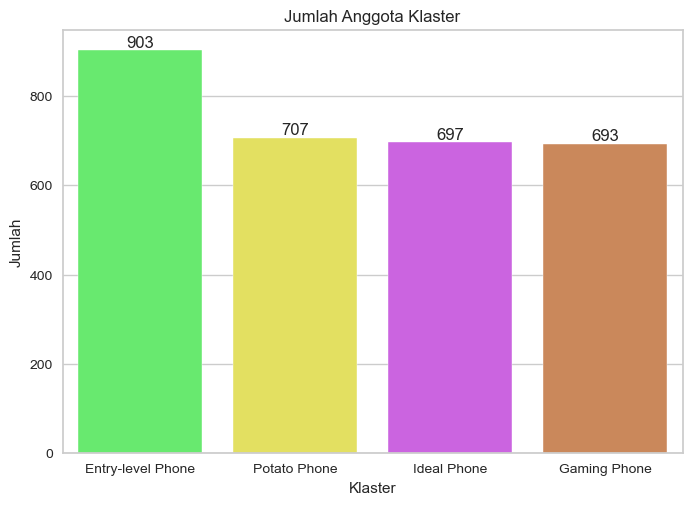

In [50]:
#Plot jumlah anggota klaster
g1 = sns.countplot(data = hasil_klaster, x = 'Nama Klaster', order = hasil_klaster['Nama Klaster'].value_counts().index,
                   palette = ['#53FE5C', '#F9F54B', '#D94FF5', '#DC8449'])
g1.set(xlabel = 'Klaster', ylabel = 'Jumlah', title = 'Jumlah Anggota Klaster')
for i in g1.containers:
    g1.bar_label(i, )
plt.show()

- Ponsel Entry-level lebih dominan diminati daripada jenis ponsel lain.

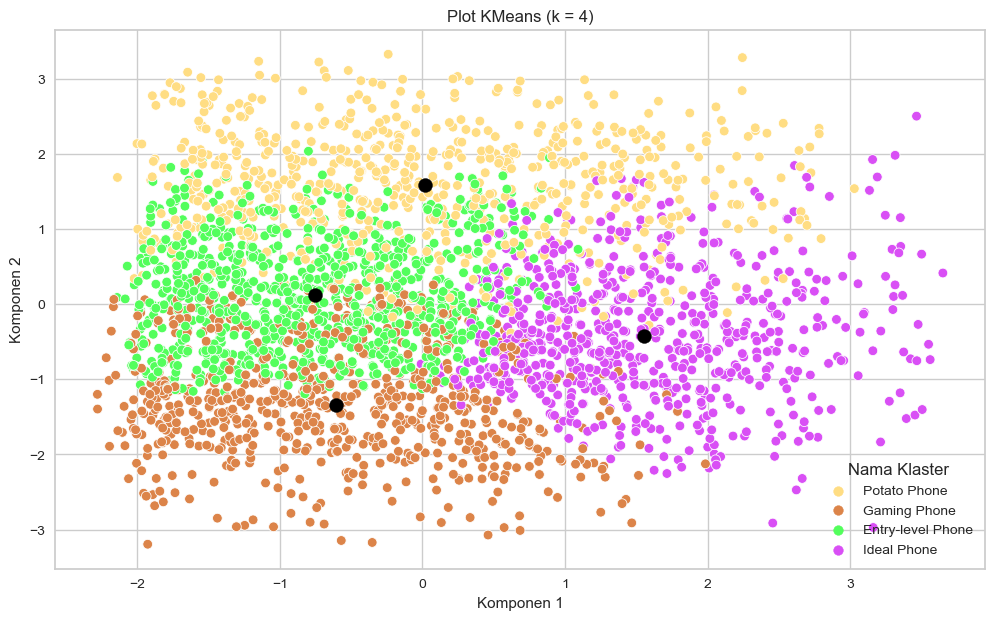

In [47]:
fig = plt.figure(figsize = (12,7))
sns.scatterplot(data = hasil_klaster, x = 'Komponen 1', y = 'Komponen 2', hue = 'Nama Klaster',
                palette = ['#FFDD83', '#DC8449', '#53FE5C', '#D94FF5'])
centers = np.array(kmeans2.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], color='black', s=100)
plt.title('Plot KMeans (k = 4)')
plt.show()

- Hasil klaster cenderung tumpang tindih atau overlapping sehingga suatu objek seperti masuk ke dalam beberapa klaster.
- **Potato Phone** sebanyak 707 data, **Entry-level Phone** sebanyak 903 data, **Gaming Phone** sebanyak 693 data, dan **Ideal Phone** sebanyak 697 data.
- Komponen 1 (fotografi) pada klaster 1 (**Entry-level Phone**) cenderung rendah dan komponen 2 (sinyal) cenderung tinggi.
- **Entry-level Phone** merupakan spesifikasi yang paling banyak dicari, kemungkinan karena beberapa orang baru beralih dari ponsel biasa ke smartphone dengan interface yang mudah dipahami.  Harga ponsel relatif lebih murah, namun sudah cukup dalam mendukung berbagai aktivitas dasar, seperti menonton video dan juga browsing serta menggunakan media sosial.

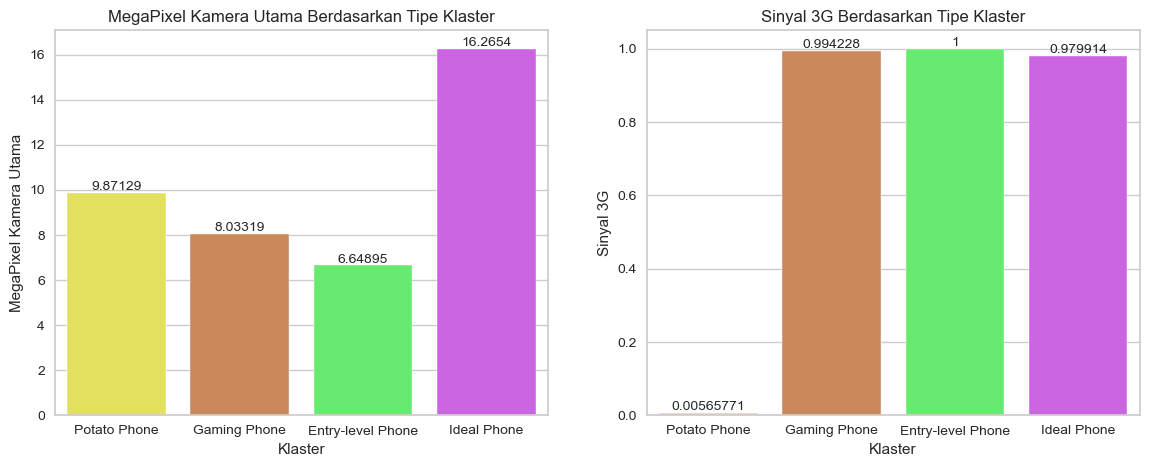

In [42]:
#Sebutan klaster
data['Nama Klaster'] = hasil_klaster['Klaster KMeans 2']
data['Nama Klaster'] =  data['Nama Klaster'].map(tipe)

#Plot tipe klaster
fig, ax = plt.subplots(1, 2, figsize = (14, 5))

sns.barplot(ax = ax[0], data = data, x = 'Nama Klaster', y = 'pc', ci = None, 
            palette = ['#F9F54B', '#DC8449', '#53FE5C', '#D94FF5'])
ax[0].set(xlabel = 'Klaster', ylabel = 'MegaPixel Kamera Utama', title = 'MegaPixel Kamera Utama Berdasarkan Tipe Klaster')
for i in ax[0].containers:
    ax[0].bar_label(i, fontsize = 10)
    
sns.barplot(ax = ax[1], data = data, x = 'Nama Klaster', y = 'three_g', ci = None,
            palette = ['#F9F54B', '#DC8449', '#53FE5C', '#D94FF5'])
ax[1].set(xlabel = 'Klaster', ylabel = 'Sinyal 3G', title = 'Sinyal 3G Berdasarkan Tipe Klaster')
for i in ax[1].containers:
    ax[1].bar_label(i, fontsize = 10)

- Ponsel entry-level cenderung memiliki kualitas kamera utama yang rendah, namun sudah support sinyal 3G.

# <center> Saran </center>

- Karena **Entry-level Phone** dominan dicari, maka perlu dilakukan peningkatan fitur misal penambahan resolusi kamera dengan mempertahankan interface yang mudah dipahami dan harga yang terjangkau.